<a href="https://colab.research.google.com/github/vladislavdarii/Ship-classification-using-Machine-Learning-techniques/blob/main/00_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

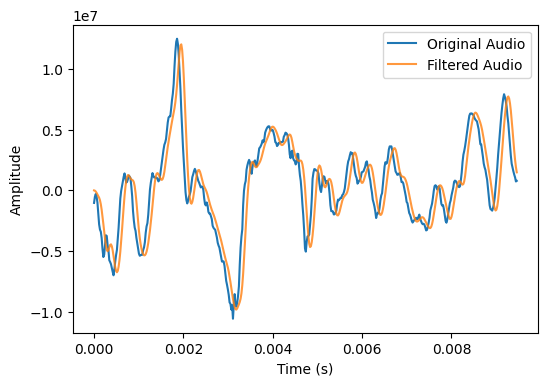

In [ ]:
#@title 0.0 Signal filtering and resampling

import scipy.signal as signal

def apply_low_pass_filter(y, sr, cutoff_freq, order=4):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_audio = signal.lfilter(b, a, y)
    return filtered_audio

def get_audio_data_for_resampling(num: int):

    # Number out of scope
    if num < 0 or num > 77:
      print("Careful! Number out of scope...")
      return 0 , []

    # Number in scope
    else:

     # Sample rate and data extraction of the audio
     for path2 in os.listdir('./drive/MyDrive/TFG/02. Base de datos ShipsEar/shipsEar_AUDIOS/'):

        # Logic to select desired audio file
        if int(path2.split("__")[0]) == num:
            path1 = path2

     # Data extraction
     samplerate, data = wavfile.read(f"./drive/MyDrive/TFG/02. Base de datos ShipsEar/shipsEar_AUDIOS/{path1}")

     return samplerate, data, path1

a = 0 # control to not execute it accidentally
if a == 1:
  # Load audio file using librosa
    a=3
    sr, y, path = get_audio_data_for_resampling(a)

    # Cutoff frequency and order of the low-pass filter
    cutoff_freq = 5000
    order = 4

    # Apply the low-pass filter
    filtered_audio = apply_low_pass_filter(y, sr, cutoff_freq, order)

    # Resample to 5000 Hz
    #resampled_audio = librosa.resample(filtered_audio.astype(float), orig_sr = sr, target_sr = 5000)
    resampled_audio = filtered_audio
    # Save resampled audio to file in folder
    #wav.write(f"./drive/MyDrive/TFG/02. Base de datos ShipsEar/shipsEar_AUDIOS_resampled/{path}",  5000, resampled_audio)

  # Plot the original and filtered audio signals
    time = np.arange(0, len(y)) / sr

    plt.figure(figsize=(6, 4))
    plt.plot(time[:500], y[:500], label='Original Audio')
    plt.plot(time[:500], resampled_audio[0:500], label='Filtered Audio', alpha = 0.8)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

In [ ]:
#@title 0.1 Audio Waveform check

#This cell will be used as a check for plots (in case I want to check something about the signal)

#Introduce here the number of the plot you want to check for
def get_audio_waveform(x: int):

  #Data extraction
  samplerate, data, path = get_audio_data(x)

  #Print Duration in seconds
  print(f'The duration is {len(data)/samplerate} s')

  #plt1.set_ylabel('Signal', labelpad=10)

  # Plotting in time
  time = np.arange(0, len(data)/samplerate, 1/samplerate)

  fig, ax = plt.subplots(figsize=(16, 4))
  ax.plot(time, data)

  #Plotting label
  ax.set_xlabel('time [s]')
  ax.set_ylabel('signal')

  return

In [ ]:
#@title 1.0 Imports and drive mount for data processing

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
from random import randint

#Resampling wav files
import librosa
import scipy.io.wavfile as wav

#Train and Test data separator
from sklearn.model_selection import train_test_split

#Writing and loading variables
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title 1.1 Function: Check Ram fn

def RAM():
  import psutil
  print("RAM usage: ", psutil.Process().memory_info().rss / 1024 ** 2, "MB")

In [ ]:
#@title 1.2 Function: Get Audio Data
#Function that extracts the sample rate and data from the audio
def get_audio_data(num: int):

    # Number out of scope
    if num < 0 or num > 77:
      print("Careful! Number out of scope...")
      return 0 , []

    # Number in scope
    else:

     # Sample rate and data extraction of the audio
     for path2 in os.listdir('./drive/MyDrive/TFG/02. Base de datos ShipsEar/shipsEar_AUDIOS_resampled/'):

        # Logic to select desired audio file
        if int(path2.split("__")[0]) == num:
            path1 = path2

     # Data extraction
     samplerate, data = wavfile.read(f"./drive/MyDrive/TFG/02. Base de datos ShipsEar/shipsEar_AUDIOS_resampled/{path1}")

     return samplerate, data, path1

In [ ]:
#@title 1.3 Function: Representation of Train and Test data
def data_rep():
  counts = {0: 0, 1: 0, 2: 0, 3: 0}

  for number in y_train:
      counts[number] += 1

  print('Train data: ', counts)

  # Set bar colors
  bar_colors = ['#34495E', '#D1D1D1', '#FF7F50', '#F2D7D5']

  #Plot train data
  fig , (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,5), sharey = True)
  ax1.bar(counts.keys(), counts.values(), color=bar_colors)

  # Add labels and title
  ax1.set_xlabel('Boat type')
  ax1.set_ylabel('Count')
  ax1.set_title('Train Data')

  counts = {0: 0, 1: 0, 2: 0, 3: 0}

  for number in y_val:
      counts[number] += 1

  #Plot val data
  ax2.bar(counts.keys(), counts.values(), color=bar_colors)

  # Add labels and title
  ax2.set_xlabel('Boat type')
  ax2.set_ylabel('Count')
  ax2.set_title('Val Data')

  print('Val data: ', counts)

  counts = {0: 0, 1: 0, 2: 0, 3: 0}

  for number in y_test:
      counts[number] += 1

  #Plot test data
  ax3.bar(counts.keys(), counts.values(), color=bar_colors)

  # Add labels and title
  ax3.set_xlabel('Boat type')
  ax3.set_ylabel('Count')
  ax3.set_title('Test Data')

  print('Test data: ', counts)
  return

In [ ]:
#@title 2.0 File segmentation

#Var that will store all the different fragments from the audio files and labels
alldata = []
classes = ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'D', 'C', 'D', 'D', 'D', 'B', 'D', 'D', 'D', 'D', 'B', 'B', 'A', 'B', 'B', 'A', 'C', 'B', 'C', 'C', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'B', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'B', 'D', 'B', 'D', 'B', 'A', 'A', 'A', 'A', 'B', 'D', 'B', 'A', 'A', 'A', 'A', 'A']
labels = []
ad_index = [0]

idx = 0
a = 0

#Iterate for every element in the specified path extracting the path name of each file
for a in range(78):

 #Extracting Sample rate and data for each file

  sr, data, path = get_audio_data(a)

  #Creating var for start and end of each audio file
  start = 0
  end = len(data)

  #Transform data into np array
  data = np.array(data, dtype=np.int64)

  #Get the number of segments in each audio file.
  num_segments = len(data)// (5000)

  #Get the 1 second segments of the audio file
  segments = np.split(data[:num_segments * 5000], num_segments)
  alldata.extend(segments)
  labels.extend([classes[a]] * num_segments)

  #Create an index to be able to know which segments belong to which audios
  idx += num_segments
  ad_index.append(idx)

#Np array conversion of alldata
alldata = np.array(alldata)
labels = np.array(labels)

#Used RAM check
RAM()

RAM usage:  1008.6953125 MB


In [ ]:
#@title 2.1 Label amount check
#Function to check that the total amount of segments in alldata matches the total amount of labels.

#Len of alldata and len of labels should be the same if correct
print(len(labels))
print(len(alldata))
len(classes)

10160
10160


78

In [ ]:
#@title 2.2 Alldata normalisation
#This block will be used to normalize alldata using MinMax

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler() #can be changed to MinMaxScaler()
alldata_norm = []

# Define a generator expression that yields normalized data for each row
alldata_norm = (scaler.fit_transform(alldata[a].reshape(-1, 1)) for a in range(alldata.shape[0]))

alldata_norm = np.squeeze(np.array(list(alldata_norm)))

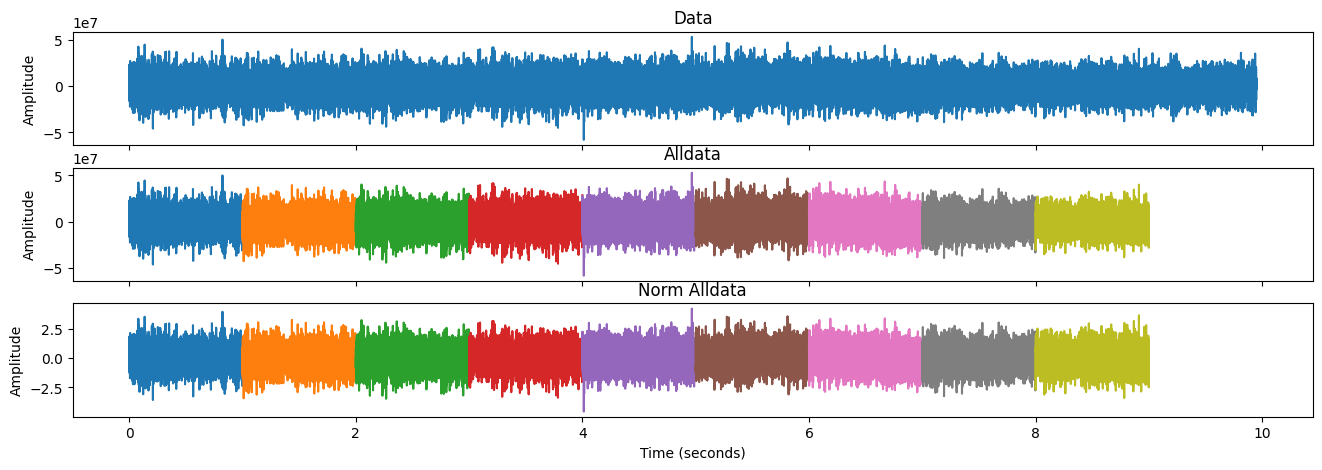

In [ ]:
#@title 2.3 Segmentation check
#Function that is used to check that the segmentation is working correctly and normalization is correct too
import random
#Set the audio number we are looking for and see the magic
x1= random.randint(0, 77)
x2 = 17

#Extract SR, Data and Path
samplerate , data , path = get_audio_data(x2)
time = np.arange(0, len(data)/samplerate, 1/samplerate)

#Create figure for both plots
fig, (ax1, ax2,ax3) = plt.subplots(3,1,figsize=(16, 5), sharex= True)

#Paint directly extracted data
ax1.plot(time,data)
ax1.set_title('Data')
ax1.set_ylabel('Amplitude')



#Paint alldata's segments data, which uses ad_index to locate the audio segments in alldata
for i in range(ad_index[x2+1]-ad_index[x2]):
    start_time = i * len(alldata[ad_index[x2]+i]) / samplerate
    time = np.arange(start_time, start_time + len(alldata[ad_index[x2]+i]) / samplerate, 1/samplerate)
    ax2.plot(time, alldata[ad_index[x2]+i])
    ax2.set_title('Alldata')
    ax2.set_ylabel('Amplitude')


#erase comments for normalised data to show up too

for i in range(ad_index[x2+1]-ad_index[x2]):
    start_time = i * len(alldata_norm[ad_index[x2]+i]) / samplerate
    time = np.arange(start_time, start_time + len(alldata_norm[ad_index[x2]+i]) / samplerate, 1/samplerate)
    ax3.plot(time, alldata_norm[ad_index[x2]+i])
    ax3.set_title('Norm Alldata')
    ax3.set_xlabel('Time (seconds)')
    ax3.set_ylabel('Amplitude')

Train data:  {0: 1251, 1: 999, 2: 2709, 3: 1543}
Val data:  {0: 279, 1: 250, 2: 671, 3: 426}
Test data:  {0: 345, 1: 311, 2: 890, 3: 486}


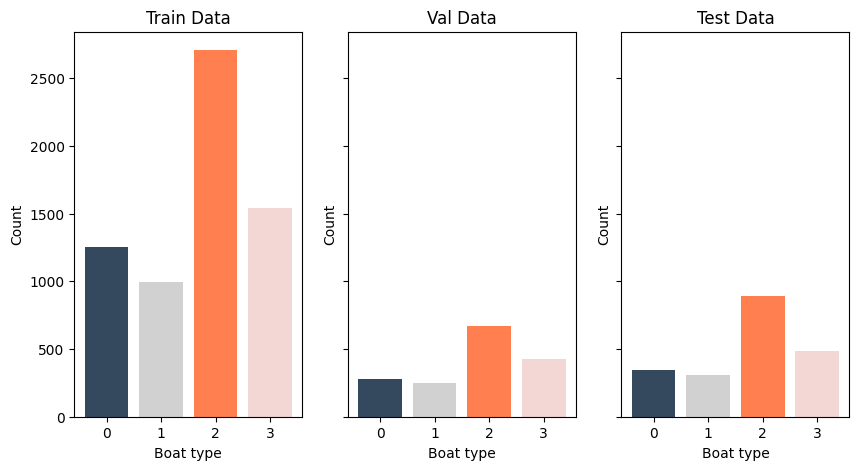

In [ ]:
#@title 3.0 Train, Validation and Test data split
#This block will be used to separate alldata into train validation and test data.

#Alldata separation into train and test
X_train, X_test, y_train, y_test = train_test_split( alldata,
                                                    labels,
                                                    test_size=0.20,
                                                    random_state=randint(1,50))

# Create a dictionary to map letters to numbers
mapping_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Use a list comprehension to apply the mapping to each element in y_train
y_train = [mapping_dict[element] for element in y_train]

# Use a list comprehension to apply the mapping to each element in y_test
y_test = [mapping_dict[element] for element in y_test]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2, random_state=randint(0,50))

data_rep()

In [ ]:
#@title Adhoc Train Balance

from imblearn.under_sampling import RandomUnderSampler

#Count number of samples in X_train and labels for each class
counts = {0: 0, 1: 0, 2: 0, 3: 0}

cf = 1.1 #Coefficient to reduce or augment Class C samples

for number in y_train:
    counts[number] += 1

# Define the desired number of instances for each class.
# As class 2 (Boat type C) has more, we make it equal to Class D or in this case we set all the samples to the same ammount

sampling_strategy = {0: counts[0],
                     1: counts[1],
                     2: int(counts[3]*cf),
                     3: counts[3]}

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy,random_state=randint(1,50))

# Resample the training data
X_train, y_train= rus.fit_resample(X_train, y_train)


Train data:  {0: 1251, 1: 999, 2: 1697, 3: 1543}
Val data:  {0: 279, 1: 250, 2: 671, 3: 426}
Test data:  {0: 345, 1: 311, 2: 890, 3: 486}


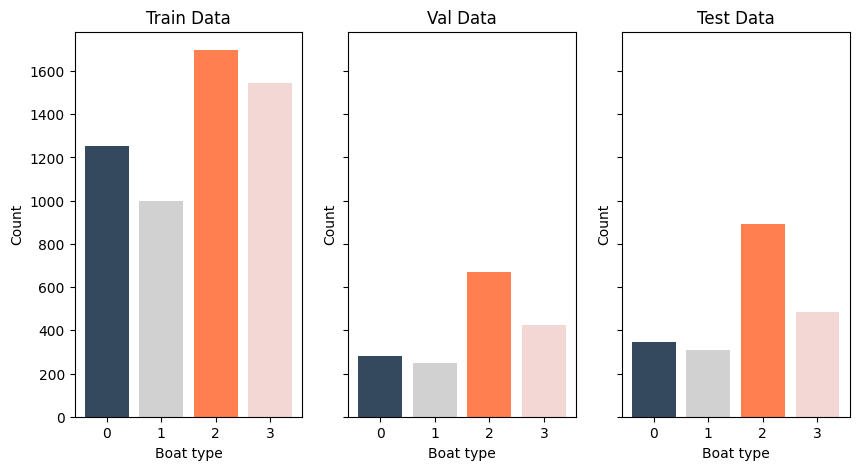

In [ ]:
data_rep()

Train data:  {0: 1183, 1: 1017, 2: 1717, 3: 1580}
Val data:  {0: 309, 1: 232, 2: 429, 3: 405}
Test data:  {0: 383, 1: 311, 2: 554, 3: 470}


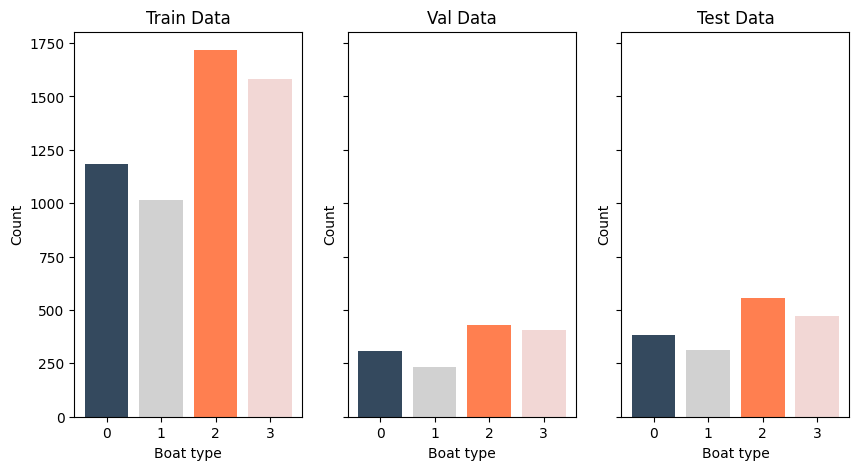

In [ ]:
#@title 3.1 Class balance

from imblearn.under_sampling import RandomUnderSampler

# Create a dictionary to map letters to numbers
mapping_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Use a list comprehension to apply the mapping to each element in labels
labels1 = [mapping_dict[element] for element in labels]


#Count number of samples in X_train and labels for each class
counts = {0: 0, 1: 0, 2: 0, 3: 0}

cf = 1.1 #Coefficient to reduce or augment Class C samples

for number in labels1:
    counts[number] += 1

# Define the desired number of instances for each class.
# As class 2 (Boat type C) has more, we make it equal to Class D or in this case we set all the samples to the same ammount

sampling_strategy = {0: counts[0],
                     1: counts[1],
                     2: int(counts[3]*cf),
                     3: counts[3]}

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy,random_state=randint(1,50))

# Resample the training data
X_balanced, y_balanced= rus.fit_resample(alldata, labels1)

#Alldata separation into train and test
X_train, X_test, y_train, y_test = train_test_split( X_balanced,
                                                    y_balanced,
                                                    test_size=0.20,
                                                    random_state=randint(1,50))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2, random_state=randint(1,50))

data_rep()


In [ ]:
#@title 1.3 Function: Representation of Train and Test data (Used ones for section methods)
def data_rep2():
  counts = {0: 0, 1: 0, 2: 0, 3: 0}

  for number in y_train:
      counts[number] += 1

  print('Train data: ', counts)

  # Set bar colors
  bar_colors = ['#34495E', '#D1D1D1', '#FF7F50', '#F2D7D5']
  fade_colors = ['#ADB6BE', '#ececec', '#ffcbb9','#d9c1bf']
  #Plot train data
  fig , (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,5), sharey = True)
  ax1.bar(counts.keys(), counts.values(), color=bar_colors)

  descoped = [0, 0, 1002, 0]
  ax1.bar(range(len(descoped)), descoped, bottom=list(counts.values()), color=fade_colors)


  # Add labels and title
  ax1.set_xlabel('Boat type')
  ax1.set_ylabel('Count')
  ax1.set_title('Train Data')
  ax1.set_xticklabels(['A','A', 'B', 'C', 'D'])
  counts = {0: 0, 1: 0, 2: 0, 3: 0}

  for number in y_val:
      counts[number] += 1

  #Plot val data
  ax2.bar(counts.keys(), counts.values(), color=bar_colors)
  descoped = [0, 0, 232, 0]
  ax2.bar(range(len(descoped)), descoped, bottom=list(counts.values()), color=fade_colors)

  # Add labels and title
  ax2.set_xlabel('Boat type')
  ax2.set_title('Validation Data')
  ax2.set_xticklabels(['A','A', 'B', 'C', 'D'])
  print('Val data: ', counts)

  counts = {0: 0, 1: 0, 2: 0, 3: 0}

  for number in y_test:
      counts[number] += 1

  #Plot test data
  ax3.bar(counts.keys(), counts.values(), color=bar_colors)
  descoped = [0, 0, 336, 0]
  ax3.bar(range(len(descoped)), descoped, bottom=list(counts.values()), color=fade_colors)
  # Add labels and title
  ax3.set_xlabel('Boat type')
  ax3.set_title('Test Data')
  ax3.set_xticklabels(['A','A', 'B', 'C', 'D'])
  print('Test data: ', counts)
  return

In [ ]:
#@title 3.2 Save class balanced data
# Define the directory where you want to save the file
directory = "./drive/MyDrive/TFG/Data/"

# Save the variables to a file
with open(os.path.join(directory, "data_exp.pkl"), "wb") as f:
    pickle.dump((X_train, X_test, X_val, y_train, y_test, y_val), f)

RAM()

RAM usage:  1626.8984375 MB


Train data:  {0: 1203, 1: 995, 2: 2721, 3: 1583}
Val data:  {0: 284, 1: 262, 2: 682, 3: 398}
Test data:  {0: 388, 1: 303, 2: 867, 3: 474}


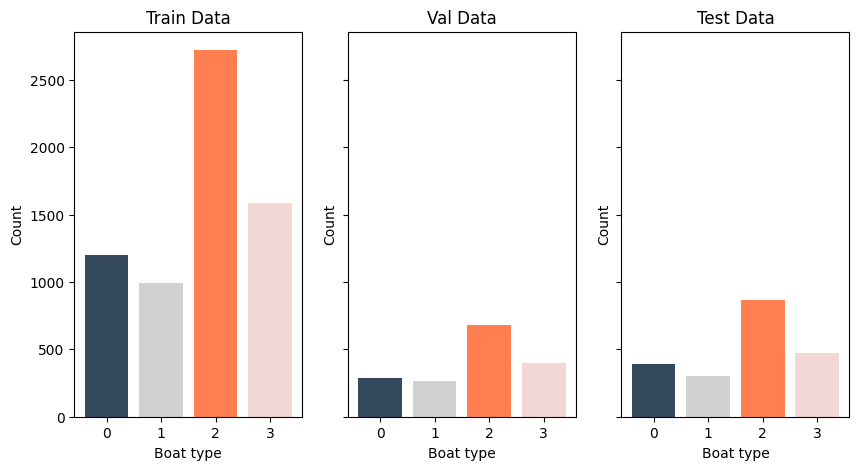

In [ ]:
#@title 4.0 Train, Validation and Test normalised data separation
#This block will be used to separate alldata_norm into train and test data

#Alldata separation into train and test
X_train, X_test, y_train, y_test = train_test_split( alldata_norm,
                                                    labels,
                                                    test_size=0.20,
                                                    random_state=42)

# Create a dictionary to map letters to numbers
mapping_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Use a list comprehension to apply the mapping to each element in y_train
y_train = [mapping_dict[element] for element in y_train]

# Use a list comprehension to apply the mapping to each element in y_test
y_test = [mapping_dict[element] for element in y_test]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2, random_state=42)

data_rep()

Train data:  {0: 1202, 1: 988, 2: 1719, 3: 1588}
Val data:  {0: 296, 1: 250, 2: 450, 3: 379}
Test data:  {0: 377, 1: 322, 2: 531, 3: 488}


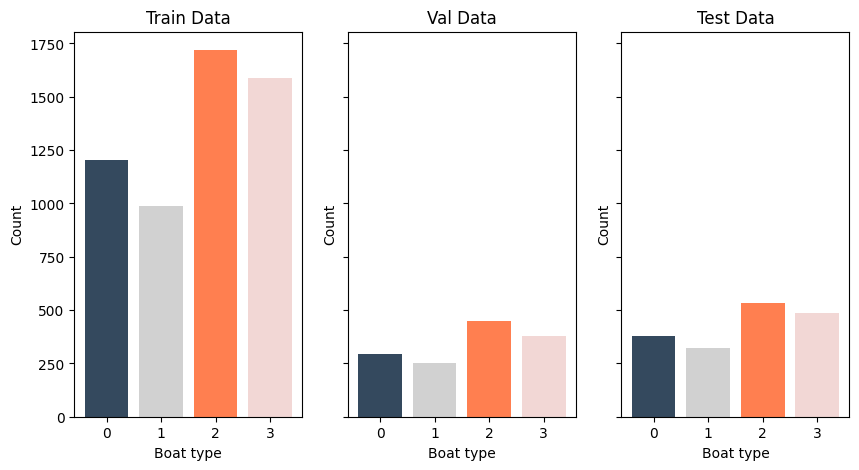

In [ ]:
#@title 4.1 Class balance

from imblearn.under_sampling import RandomUnderSampler

# Create a dictionary to map letters to numbers
mapping_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Use a list comprehension to apply the mapping to each element in labels
labels1 = [mapping_dict[element] for element in labels]


#Count number of samples in X_train and labels for each class
counts = {0: 0, 1: 0, 2: 0, 3: 0}

cf = 1.1 #Coefficient to reduce or augment Class C samples

for number in labels1:
    counts[number] += 1

# Define the desired number of instances for each class.
# As class 2 (Boat type C) has more, we make it equal to Class D or in this case we set all the samples to the same ammount

sampling_strategy = {0: counts[0],
                     1: counts[1],
                     2: int(counts[3]*cf),
                     3: counts[3]}

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy,random_state=42)

# Resample the training data
X_balanced, y_balanced= rus.fit_resample(alldata, labels1)

#Alldata separation into train and test
X_train, X_test, y_train, y_test = train_test_split( X_balanced,
                                                    y_balanced,
                                                    test_size=0.20,
                                                    random_state=2)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2, random_state=2)

data_rep()

In [ ]:
#@title 4.2 Save class balanced normalised data


# Define the directory where you want to save the file
directory = "./drive/MyDrive/TFG/Data/"

# Save the variables to a file
with open(os.path.join(directory, "data_norm.pkl"), "wb") as f:
    pickle.dump((X_train, X_test, X_val, y_train, y_test, y_val), f)

RAM()

RAM usage:  2868.76171875 MB
